# Import Library

In [ ]:
import pandas as pd             # Untuk manipulasi dan analisis data I/O dataframe (ex read dataset)
import numpy as np              # Untuk operasi numerik dan komputasi
import matplotlib.pyplot as plt # Untuk visualisasi grafik dan plot
import seaborn as sns           # Dibangun di atas plt, menyediakan visualisasi yang lebih menarik
import os                       # Akses file dan direktori
import warnings                 # Handling peringatan yang ditampilkan

# Import Dataset

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Sinkronisasi Google Colab dengan Kaggle

In [ ]:
cred = {"username":"poweropel","key":"71230ed6f57052dc913fa32348a7fc93"}

Credential bisa didapat di account kaggle kemudian scroll ke API Token

In [ ]:
!mkdir ~/.kaggle/
!touch ~/.kaggle/kaggle.json

api_token = cred
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 3.20MB/s]


Download dataset, copas link pada halaman dataset kemudian hapus bagian kaggle.com/ sisakan link setelahnya

In [ ]:
!unzip customer-segmentation-tutorial-in-python.zip

Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


Karena file masih dalam bentuk zip, maka kita perlu unzip file tersebut dan didapatkan isi dari file .zip tersebut

In [ ]:
!ls -la

total 24
drwxr-xr-x 1 root root 4096 May 23 04:35 .
drwxr-xr-x 1 root root 4096 May 23 04:32 ..
drwxr-xr-x 4 root root 4096 May 19 13:31 .config
-rw-r--r-- 1 root root 1583 May 23 04:35 customer-segmentation-tutorial-in-python.zip
-rw-r--r-- 1 root root 3981 Oct  3  2019 Mall_Customers.csv
drwxr-xr-x 1 root root 4096 May 19 13:32 sample_data


In [ ]:
cols = ['CustomerID', 'Gender', 'Age', 'Income', 'Spending']
df = pd.read_csv('../content/Mall_Customers.csv', names=cols, header=0)
df = df[['CustomerID', 'Age', 'Gender', 'Income', 'Spending']]
df.head()

,CustomerID,Age,Gender,Income,Spending
0,1,19,Male,15,39
1,2,21,Male,15,81
2,3,20,Female,16,6
3,4,23,Female,16,77
4,5,31,Female,17,40


Membaca isi dataset dan menampilkan head atau sampel bagian atas dataset

In [ ]:
df.shape

(200, 5)

Data memiliki 4 fitur utama (exclude ID) dan berisi 200 baris

# Exploratory Data Analysis

## Data Description
1. CustomerID: Unique ID assigned to the customer
2. Gender: Gender of the customer
3. Age: Age of the customer
4. Annual Income: Annual Income of the customer
5. Spending Sore: Score assigned by the mall based on customer behavior and spending nature





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Age         200 non-null    int64 
 2   Gender      200 non-null    object
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Dapat dilihat bahwa data memiliki 4 fitur numerikal dan 1 kategorikal<br>
Disini kita menggunakan Spending sebagai data target, yaitu kita akan melakukan prediksi ketika ada data baru misal dia memiliki annual income, umur, dan gender kita bisa mensegmentasi customer itu akan spending di toko kita dengan jumlah berapa.

In [ ]:
df.isna().sum()

CustomerID    0
Age           0
Gender        0
Income        0
Spending      0
dtype: int64

In [ ]:
df.isnull().sum()

CustomerID    0
Age           0
Gender        0
Income        0
Spending      0
dtype: int64

Data tidak memiliki missing value

In [ ]:
df.nunique()

CustomerID    200
Age            51
Gender          2
Income         64
Spending       84
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Income,Spending
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Visualization

<Axes: xlabel='Income', ylabel='Count'>

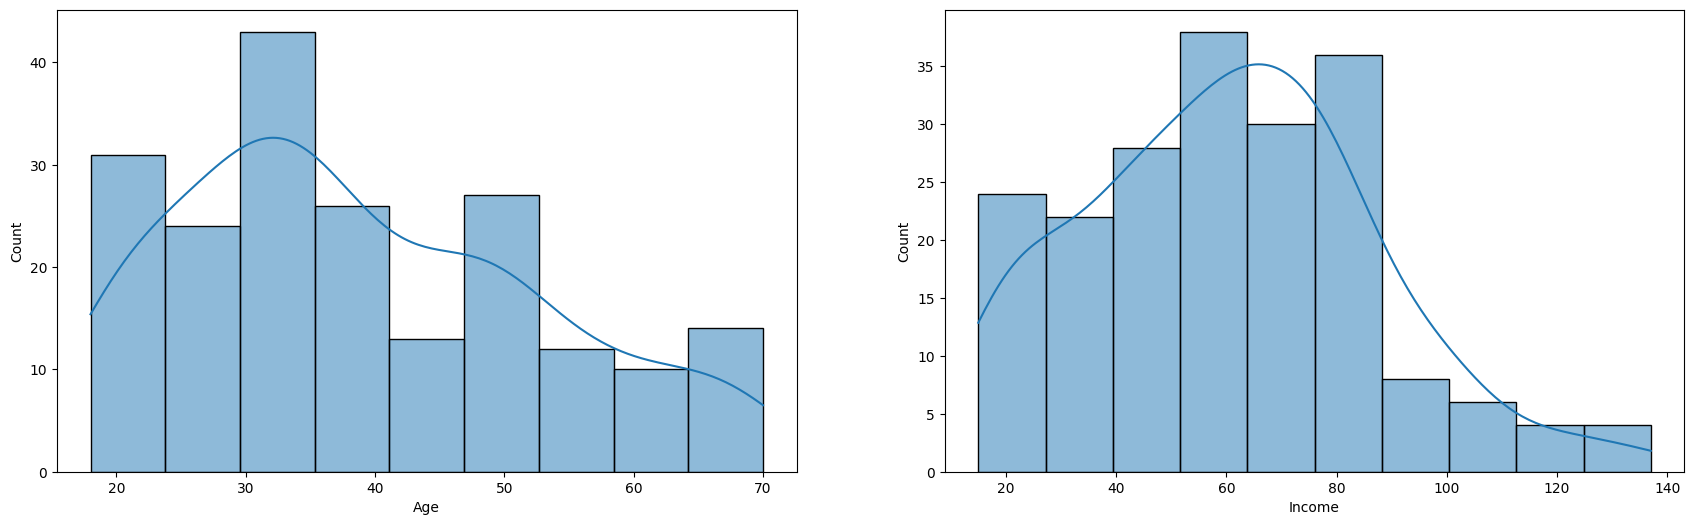

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(21,6))
sns.histplot(df['Age'], ax=axes[0], kde=True) #kernel density estimation
sns.histplot(df['Income'], ax=axes[1], kde=True)

Umur customer dalam rentang 20-70 dengan mayoritas pada 38/39 <br>
Income customer dalam rentang 20-135 dengan mayoritas pada 60

<Axes: >

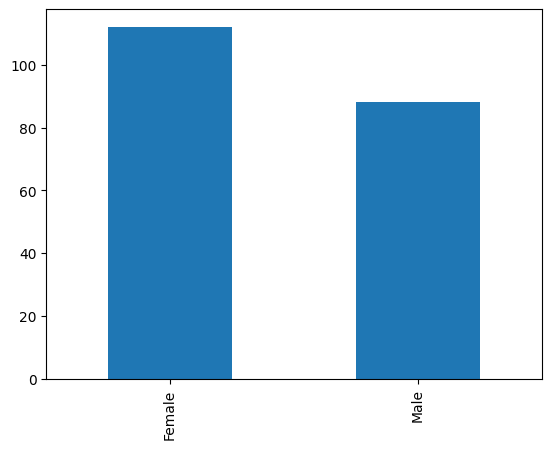

In [ ]:
df['Gender'].value_counts().plot(kind='bar')

In [ ]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<ipython-input-20-dc60dccc92f2>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Gender', y = 'Spending', data = df, palette='viridis')


<Axes: xlabel='Gender', ylabel='Spending'>

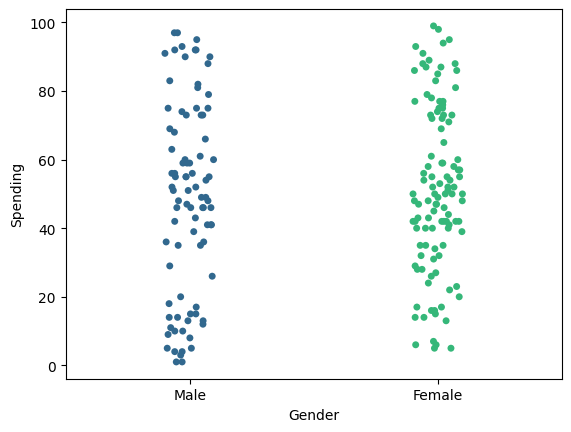

In [ ]:
sns.stripplot(x='Gender', y = 'Spending', data = df, palette='viridis')

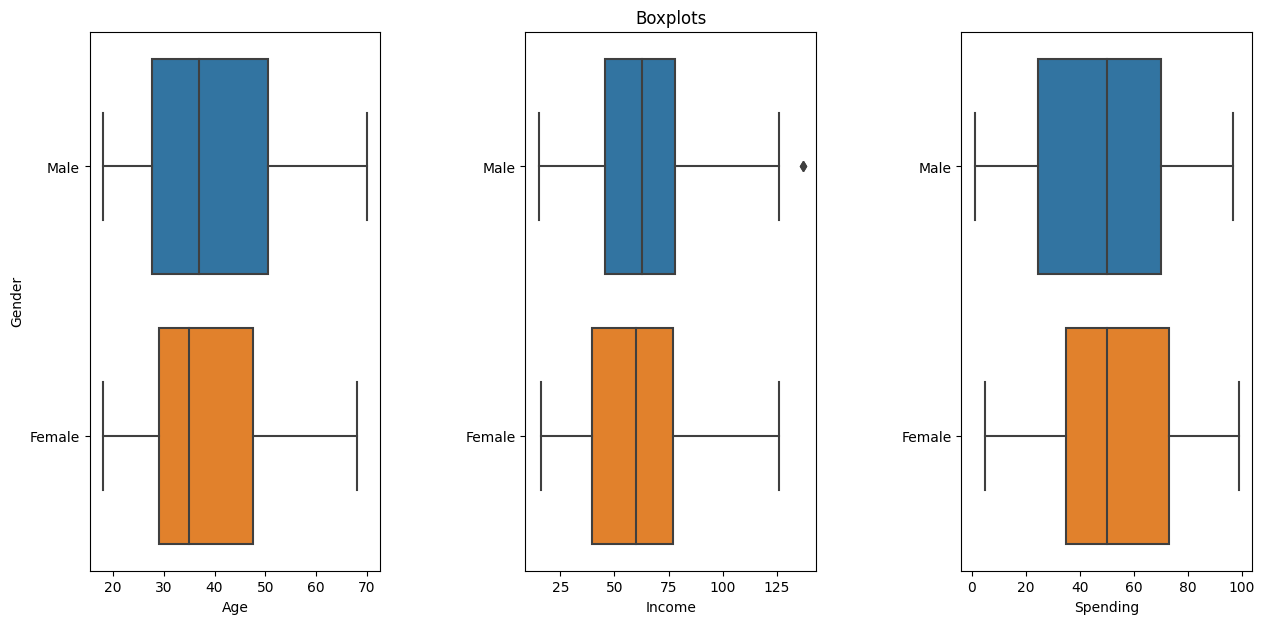

In [ ]:
plt.figure(1, figsize = (15 ,7))
n = 0 
for cols in ['Age','Income','Spending']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots' if n == 2 else '')
plt.show()

In [ ]:
cols = list(df.columns)
cols.remove('CustomerID')
print(cols)

['Age', 'Gender', 'Income', 'Spending']


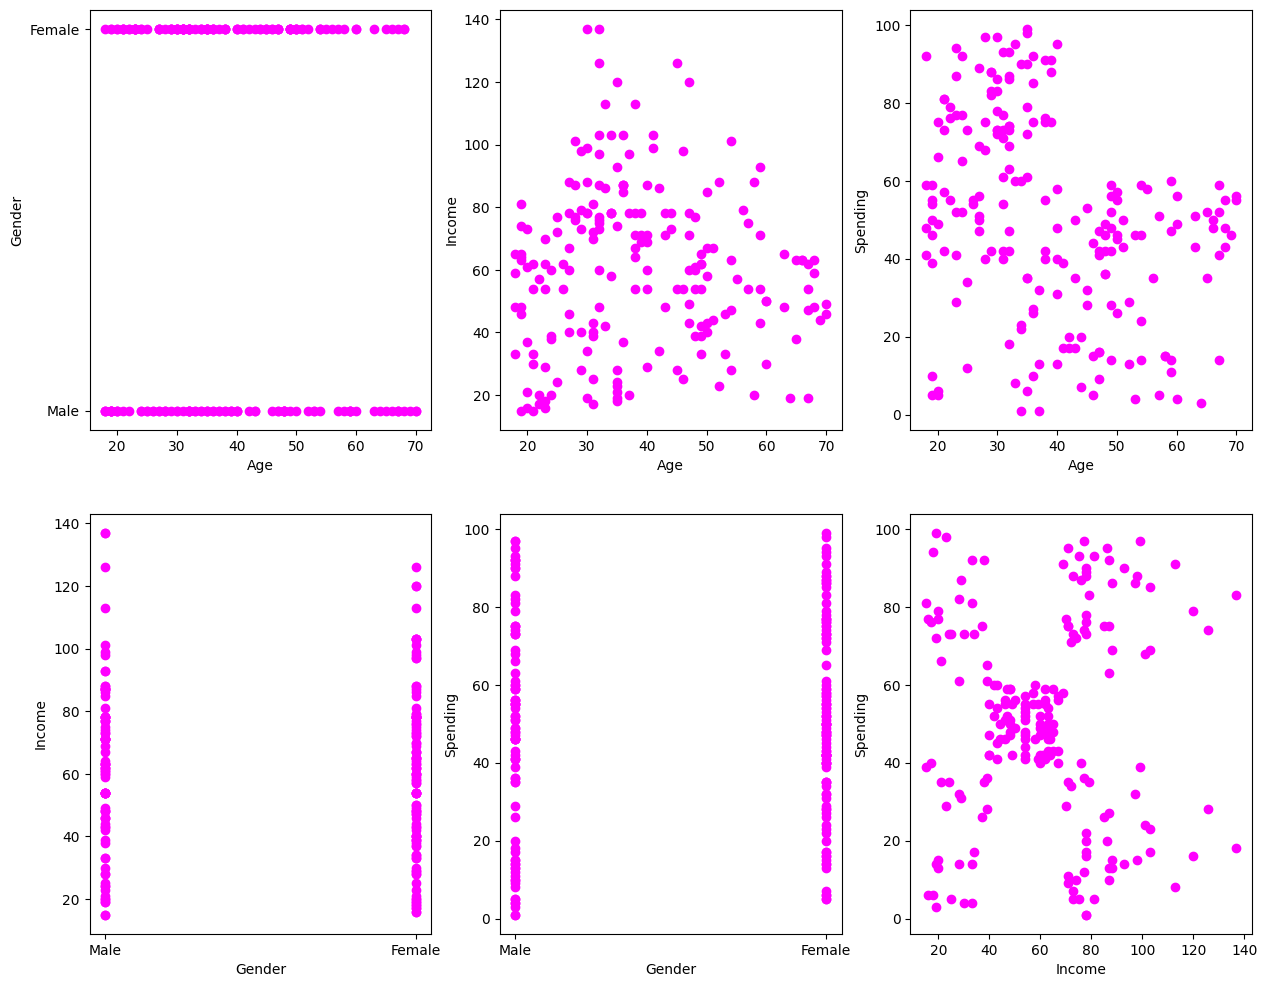

In [ ]:
# check features plot
fig, axs = plt.subplots(2, 3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.2, wspace=0.2)
col = 0
for i in range(len(cols)):
  for j in range(i+1, len(cols)):
    col += 1
    plt.subplot(2, 3, col)
    plt.scatter(df[cols[i]], df[cols[j]], c ="magenta")
    plt.ylabel(cols[j])
    plt.xlabel(cols[i])

plt.show()

<ipython-input-30-d844fdfff29e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


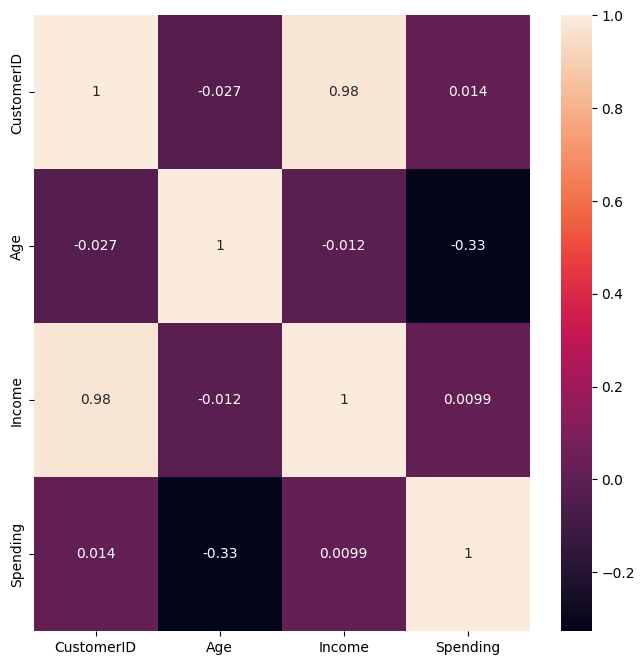

In [ ]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)

plt.show()

# Preprocessing

## Transform Feature

In [ ]:
df.drop('CustomerID', axis=1, inplace = True)

In [ ]:
map = {'Male': 0, 'Female': 1}
df.Gender.replace(map, inplace=True)

In [ ]:
def impute_age(cols):
    spend = cols
    if spend > 55:
         return 1
    else:
         return 0
df['Spending'] = df['Spending'].apply(impute_age)

In [ ]:
df.head()

,Age,Gender,Income,Spending
0,19,0,15,0
1,21,0,15,1
2,20,1,16,0
3,23,1,16,1
4,31,1,17,0


## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Spending', axis=1))
scaled_features = scaler.transform(df.drop('Spending',axis=1))
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,Age,Gender,Income
0,-1.424569,-1.128152,-1.738999
1,-1.281035,-1.128152,-1.738999
2,-1.352802,0.886405,-1.700830
3,-1.137502,0.886405,-1.700830
4,-0.563369,0.886405,-1.662660


## Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, df['Spending'], test_size=0.20)

# Modelling ML

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(Y_test, pred))
print (classification_report(Y_test, pred))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, pred)))

[[22  2]
 [ 6 10]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        24
           1       0.83      0.62      0.71        16

    accuracy                           0.80        40
   macro avg       0.81      0.77      0.78        40
weighted avg       0.80      0.80      0.79        40

Accuracy Score: 0.8


### Check best value of K for KNN

In [ ]:
error_rate = []

for i in range(1,40): # Checking every possible k value between 1-40
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))
    
error_rate

[0.2,
 0.275,
 0.15,
 0.25,
 0.1,
 0.15,
 0.15,
 0.175,
 0.15,
 0.25,
 0.225,
 0.2,
 0.15,
 0.175,
 0.125,
 0.15,
 0.1,
 0.2,
 0.125,
 0.125,
 0.15,
 0.125,
 0.15,
 0.275,
 0.275,
 0.275,
 0.275,
 0.35,
 0.35,
 0.35,
 0.35,
 0.4,
 0.4,
 0.4,
 0.425,
 0.425,
 0.425,
 0.425,
 0.425]

Text(0, 0.5, 'Mean error rate')

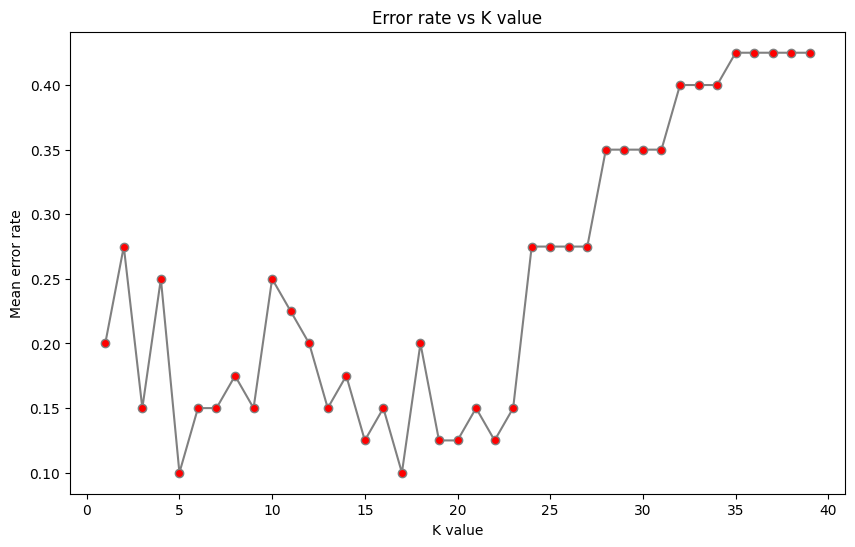

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='grey', marker='o', markerfacecolor='red')
plt.title('Error rate vs K value')
plt.xlabel('K value')
plt.ylabel('Mean error rate')

### After Change Value of K

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

print (confusion_matrix(Y_test, pred))
print (classification_report(Y_test, pred))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, pred)))

[[23  1]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.93      0.81      0.87        16

    accuracy                           0.90        40
   macro avg       0.91      0.89      0.89        40
weighted avg       0.90      0.90      0.90        40

Accuracy Score: 0.9


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion="gini", max_depth=None)
dtree.fit(X_train, Y_train)
dtree_pred = dtree.predict(X_test)

In [ ]:
print (confusion_matrix(Y_test, dtree_pred))
print (classification_report(Y_test, dtree_pred))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, dtree_pred)))

[[20  4]
 [ 4 12]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        24
           1       0.75      0.75      0.75        16

    accuracy                           0.80        40
   macro avg       0.79      0.79      0.79        40
weighted avg       0.80      0.80      0.80        40

Accuracy Score: 0.8


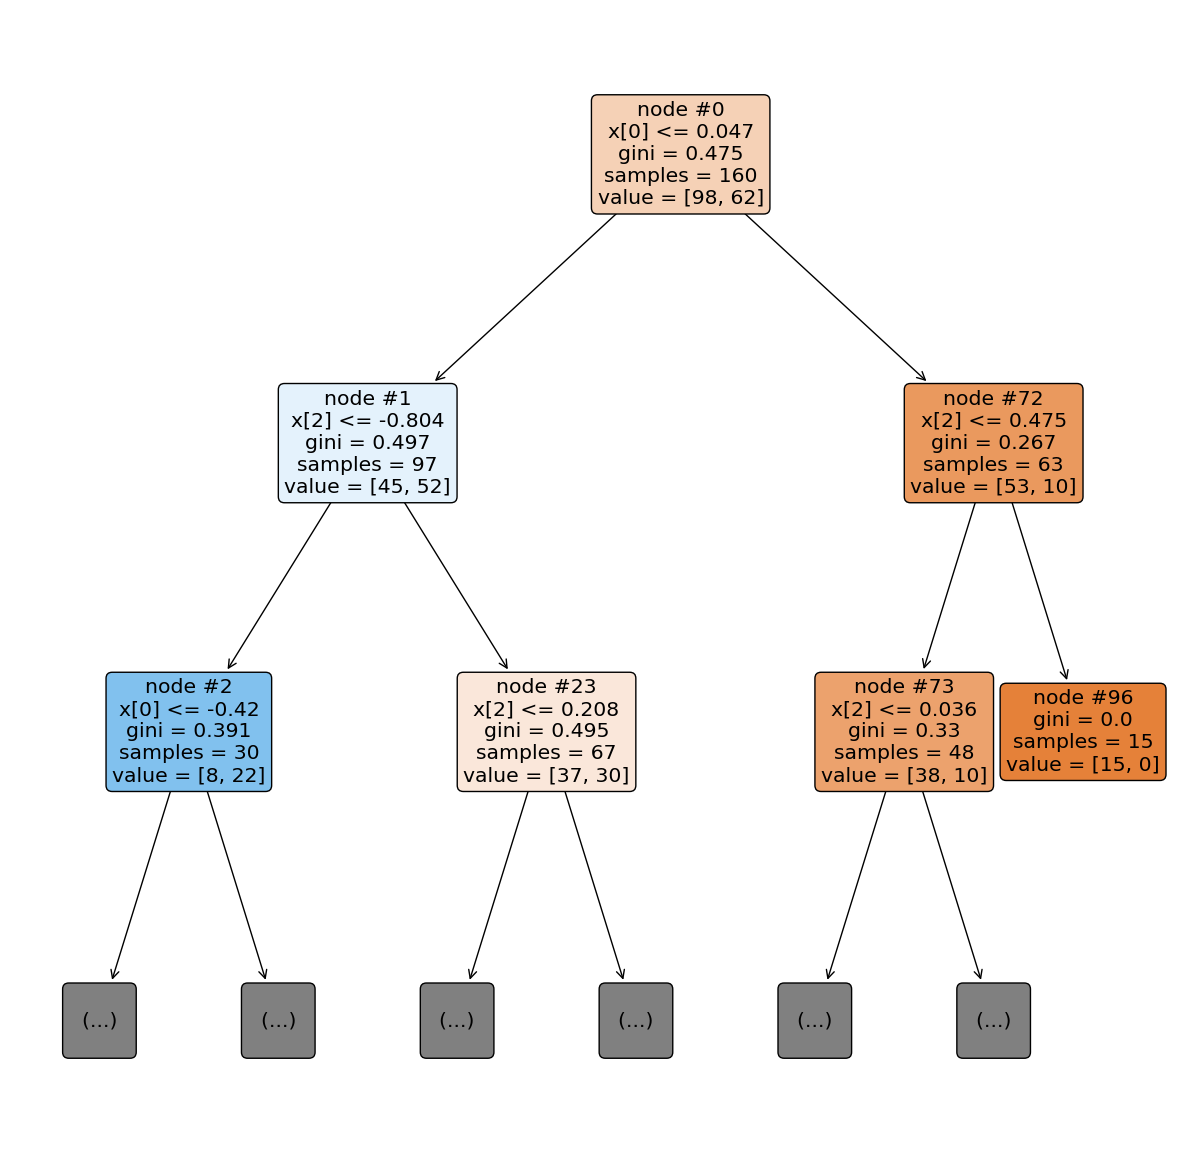

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(dtree, max_depth = 2,
            rounded = True,
            filled = True,
            impurity = True,
            node_ids = True,
          )
plt.show()

## K-Means

In [ ]:
df.head()

,CustomerID,Age,Gender,Income,Spending
0,1,19,Male,15,39
1,2,21,Male,15,81
2,3,20,Female,16,6
3,4,23,Female,16,77
4,5,31,Female,17,40


In [ ]:
# use Income and Spending columns
df.iloc[:, [3, 4]].values

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x = df.iloc[:, [3, 4]].values

wcss = []
scores = []
for i in range(2, 8):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(x, labels)
    scores.append(silhouette_avg)
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))
    

silhoutte score for n_clusters = 2 is 0.2968969162503008
silhoutte score for n_clusters = 3 is 0.46761358158775435
silhoutte score for n_clusters = 4 is 0.4931963109249047
silhoutte score for n_clusters = 5 is 0.553931997444648
silhoutte score for n_clusters = 6 is 0.5379675585622219
silhoutte score for n_clusters = 7 is 0.5264283703685728


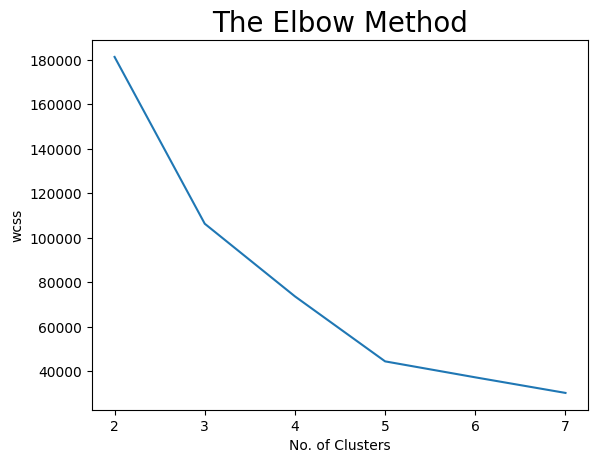

In [ ]:
# Visualizing Elbow Method
plt.plot(range(2, 8), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

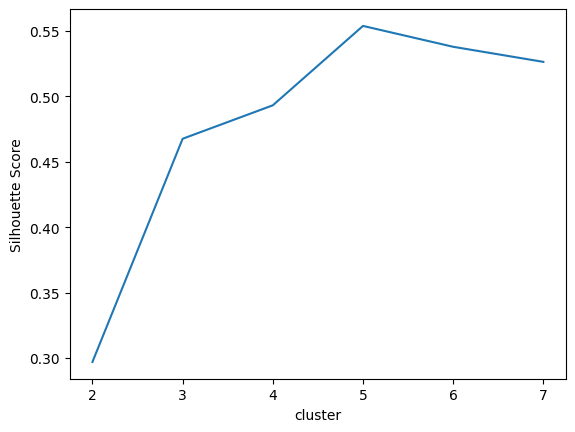

In [ ]:
# Visualizing Silhouette Score
cluster_list = [i for i in range (2, 8)]
plt.plot(cluster_list, scores)
plt.xlabel('cluster')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Model Build
kmeansmodel = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans= kmeansmodel.fit_predict(x)

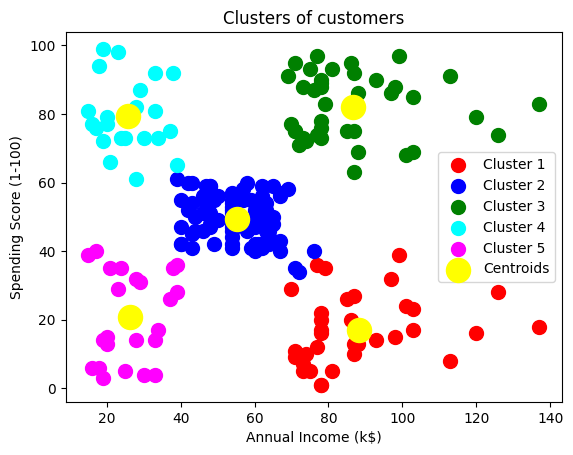

In [ ]:
# Visualizing all the clusters 

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as shc
import scipy
from scipy.cluster.hierarchy import fcluster

df_hc = df.copy()
scaler = StandardScaler()
df_matrix = scaler.fit_transform(df_hc)

In [ ]:
length = df_matrix.shape[0]
D = scipy.zeros([length,length])
for i in range(length):
    for j in range(length):
        D[i,j] = scipy.spatial.distance.euclidean(df_matrix[i], df_matrix[j])

<ipython-input-74-28cb3dac13f1>:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([length,length])


In [ ]:
Z1 = shc.linkage(D, 'complete')
max_clust = 4
clusters1 = fcluster(Z1, max_clust, criterion='maxclust')
clusters1

<ipython-input-111-ac085a49a4d2>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z1 = shc.linkage(D, 'complete')


array([2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 1, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3,
       2, 3, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 3,
       2, 2, 3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, 1, 2, 2,
       3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3,
       2, 3, 1, 3, 1, 3, 2, 3, 2, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 2, 3,
       1, 3, 1, 3, 4, 4, 1, 4, 4, 3, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [ ]:
silhouette_avg = silhouette_score(D, clusters1)
silhouette_avg

0.27112384594761124

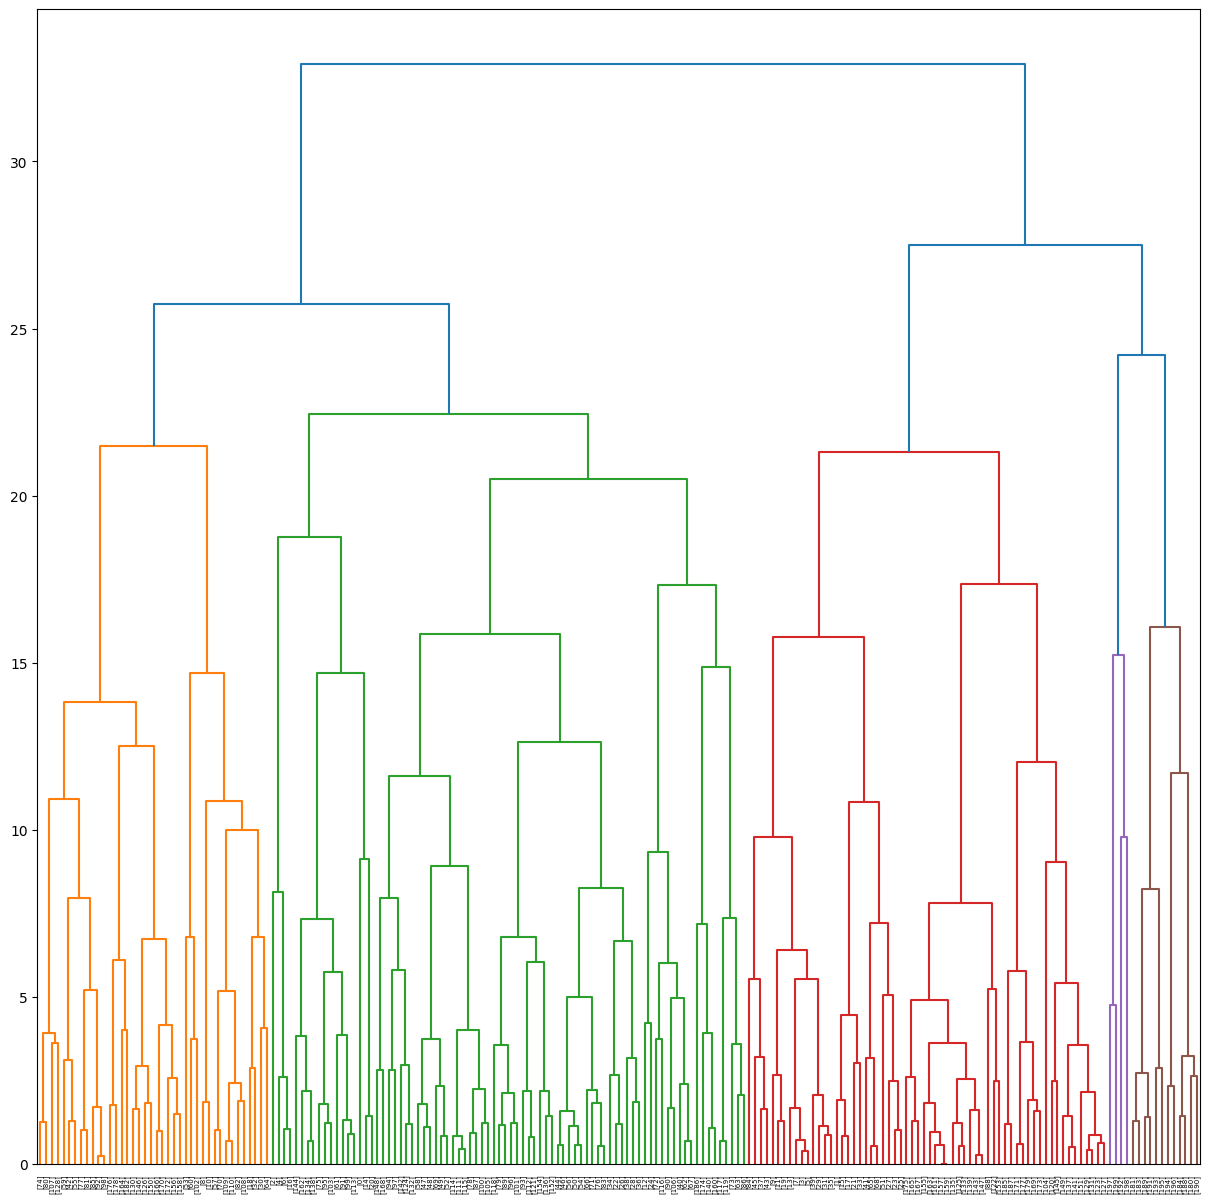

In [ ]:
plt.figure(figsize=(15,15))
dendro = shc.dendrogram(Z1, leaf_label_func=(lambda id: '[%s]' %id))

In [ ]:
Z2 = shc.linkage(D, 'single')
max_clust = 4
clusters2 = fcluster(Z2, max_clust, criterion='maxclust')
clusters2

<ipython-input-112-f27b17fed84a>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z2 = shc.linkage(D, 'single')


array([3, 4, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 4, 2, 4, 3, 1, 3, 4,
       2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 3, 4, 2, 1, 2, 1, 2, 1, 2, 4, 3, 1,
       2, 1, 2, 2, 2, 2, 2, 4, 2, 4, 2, 3, 2, 3, 2, 3, 4, 3, 2, 1, 3, 4,
       2, 2, 4, 2, 3, 2, 2, 1, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 1, 3, 1, 2,
       1, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 4, 3, 4, 2, 2, 3, 3, 3,
       3, 2, 2, 3, 2, 2, 2, 1, 2, 1, 4, 2, 1, 4, 2, 1, 3, 4, 3, 4, 3, 4,
       2, 1, 3, 1, 2, 4, 3, 1, 2, 4, 2, 1, 3, 4, 3, 1, 2, 4, 3, 4, 2, 1,
       2, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 2, 4, 3, 4, 3, 4, 2, 1,
       3, 4, 3, 4, 2, 1, 3, 1, 2, 4, 2, 4, 2, 1, 2, 1, 3, 1, 2, 1, 2, 4,
       4, 4], dtype=int32)

In [ ]:
silhouette_avg = silhouette_score(D, clusters2)
silhouette_avg

0.34291089211233

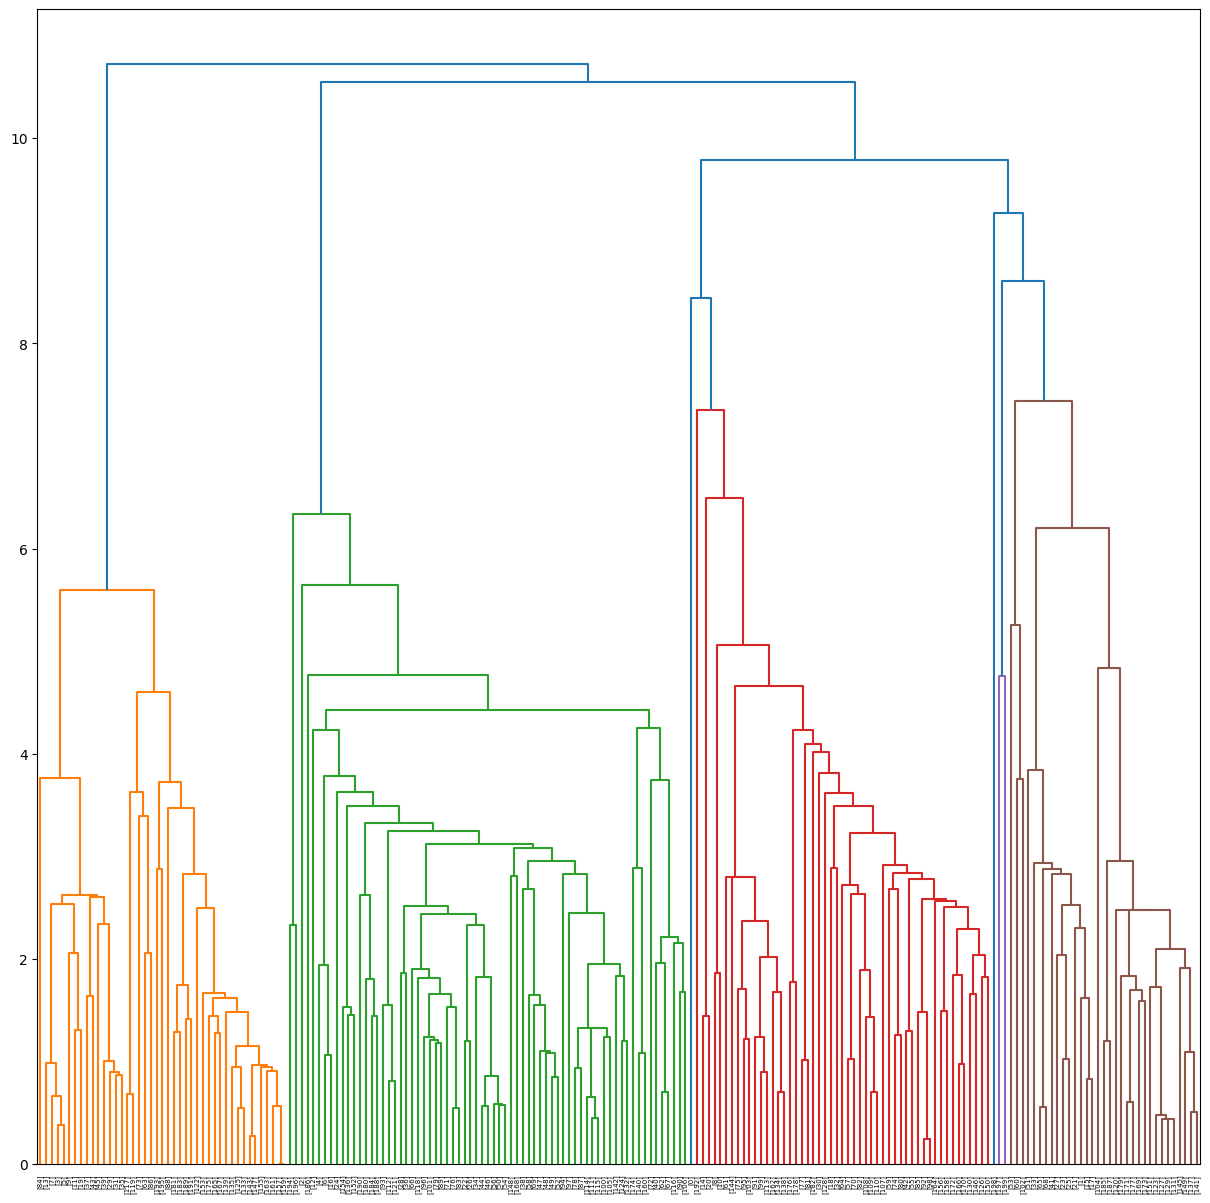

In [ ]:
plt.figure(figsize=(15,15))
dendro = shc.dendrogram(Z2, leaf_label_func=(lambda id: '[%s]' %id))

In [ ]:
Z3 = shc.linkage(D, 'average')
max_clust = 5
clusters3 = fcluster(Z3, max_clust, criterion='maxclust')
clusters3

<ipython-input-114-aed471534d35>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z3 = shc.linkage(D, 'average')


array([5, 2, 4, 3, 4, 3, 4, 3, 5, 3, 5, 3, 4, 3, 5, 2, 4, 2, 5, 3, 5, 2,
       4, 2, 4, 2, 4, 2, 4, 3, 5, 3, 5, 2, 4, 3, 4, 3, 4, 3, 4, 2, 5, 3,
       4, 3, 4, 4, 4, 4, 4, 2, 4, 5, 4, 5, 4, 5, 4, 5, 5, 5, 4, 3, 5, 2,
       4, 4, 2, 4, 5, 4, 4, 3, 5, 5, 4, 5, 4, 4, 5, 5, 5, 4, 3, 5, 3, 4,
       3, 4, 4, 5, 5, 4, 4, 5, 4, 4, 5, 5, 4, 4, 5, 5, 2, 4, 4, 5, 5, 5,
       5, 4, 4, 5, 4, 4, 4, 3, 4, 3, 2, 4, 3, 2, 4, 3, 5, 2, 5, 2, 5, 2,
       4, 3, 5, 3, 4, 2, 5, 3, 4, 2, 4, 3, 5, 2, 5, 3, 4, 2, 5, 2, 4, 3,
       4, 3, 5, 3, 5, 3, 4, 3, 5, 3, 5, 3, 5, 3, 4, 2, 5, 2, 5, 2, 4, 3,
       5, 2, 5, 2, 4, 3, 5, 3, 4, 2, 4, 2, 4, 3, 4, 3, 1, 3, 4, 3, 4, 1,
       1, 1], dtype=int32)

In [ ]:
silhouette_avg = silhouette_score(D, clusters3)
silhouette_avg

0.3433401284940895

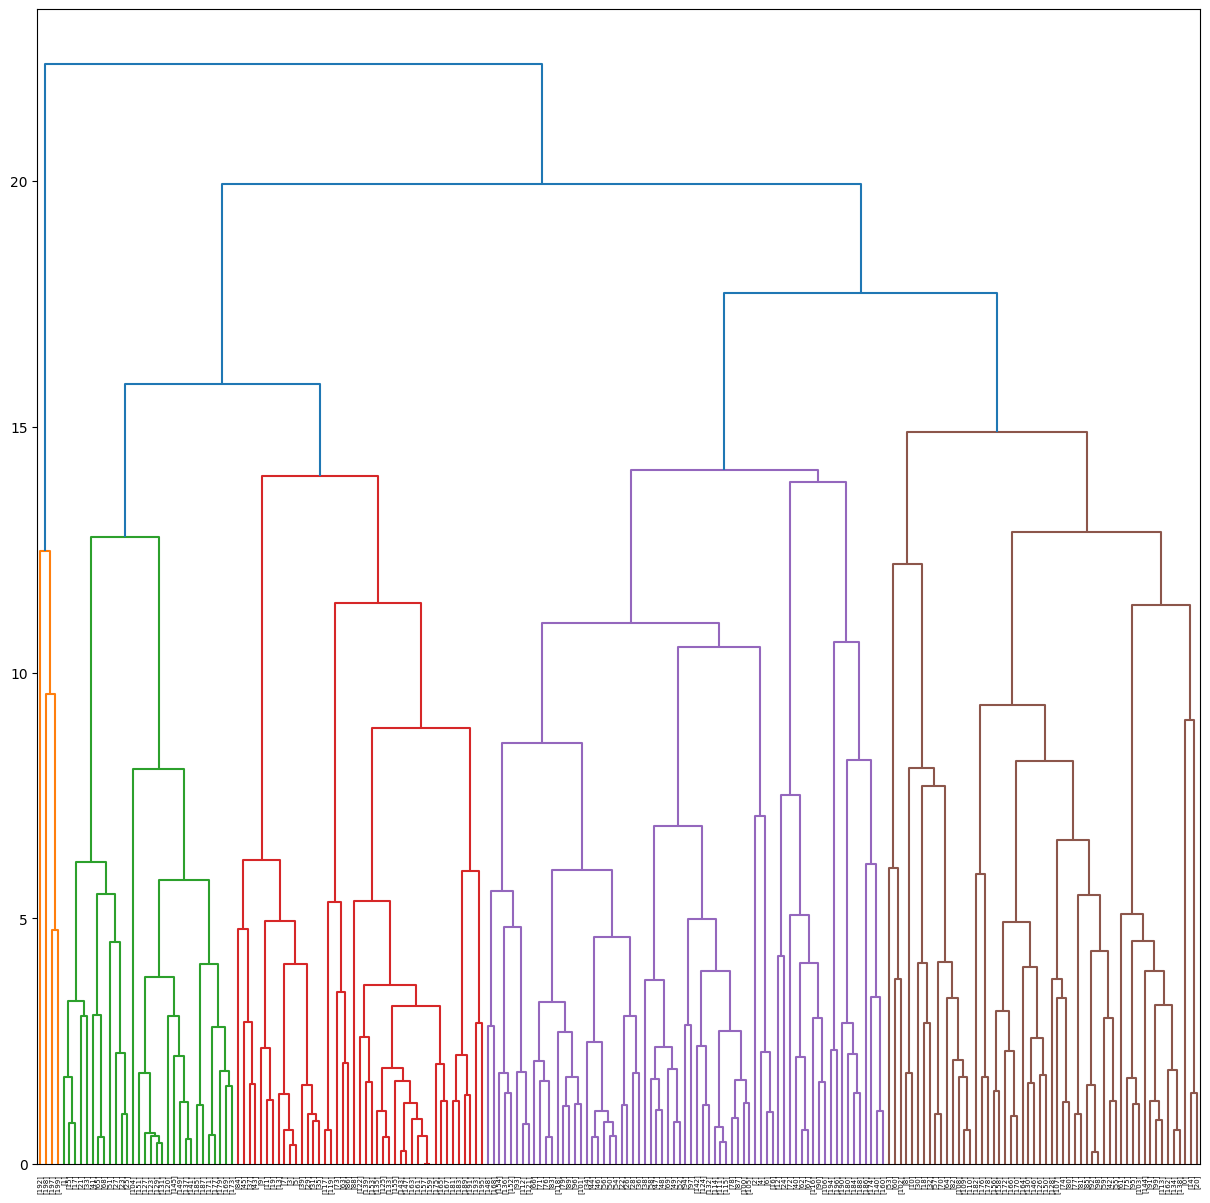

In [ ]:
plt.figure(figsize=(15,15))
dendro = shc.dendrogram(Z3, leaf_label_func=(lambda id: '[%s]' %id))